## Gina Socolich
### 10 April 2025
### Project 2 Part 2: Web Scraped Data Analysis & Visualization
### This notebook scrapes data from five Wikipedia pages related to movies, and perfoms data analsyis and visualization to answer queries about these websites.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [52]:
sns.set_theme(style="whitegrid")

## Data Scraping & Cleaning

In [78]:
def fetch_tables(url):
    tables = pd.read_html(url)
    return tables

### 1. 100% Rotten Tomatoes

In [105]:
rt_df = rt_tables[0][['Name', 'Year', 'No. of reviews']]  
rt_df.columns = ['Title', 'Year', 'Reviews'] 
rt_df.head()

,Title,Year,Reviews
0,The Golem: How He Came into the World,1920,32
1,The Kid,1921,49
2,Nanook of the North,1922,34
3,The Last Laugh,1924,31
4,The Navigator,1924,22


### 2. Highest-Paid Film Actors

In [80]:
actors_df = actors_tables[0][['Actor', 'Salary', 'Film']]
actors_df.columns = ['Actor', 'Earnings', 'Top Film']  

actors_df['Earnings'] = actors_df['Earnings'].replace('[\$,]', '', regex=True).astype(float)

actors_df.dropna(subset=['Earnings'], inplace=True)

print(actors_df.head())

               Actor    Earnings                                    Top Film
0       Keanu Reeves  30000000.0  The Matrix Reloaded The Matrix Revolutions
1       Bruce Willis  14000000.0                             The Sixth Sense
5         Tom Cruise  12500000.0                           Top Gun: Maverick
6      Alec Guinness    150000.0                                   Star Wars
9  Robert Downey Jr.  20000000.0                           Avengers: Endgame


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ginas\AppData\Local\Temp\ipykernel_62208\1415923139.py:4: SyntaxWarning: invalid escape sequence '\$'
  actors_df['Earnings'] = actors_df['Earnings'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\ginas\AppData\Local\Temp\ipykernel_62208\1415923139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors_df['Earnings'] = actors_df['Earnings'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\ginas\AppData\Local\Temp\ipykernel_62208\1415923139.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

### 3. Academy Award–Winning Films

In [81]:
oscars_url = "https://en.wikipedia.org/wiki/List_of_Academy_Award-winning_films"
oscars_tables = fetch_tables(oscars_url)
oscars_df = oscars_tables[0][['Film', 'Awards']]
oscars_df.columns = ['Title', 'Awards']
oscars_df.dropna(inplace=True)

C:\Users\ginas\AppData\Local\Temp\ipykernel_62208\155320198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscars_df.dropna(inplace=True)


### 4. Most Expensive Films

In [82]:
expensive_df = expensive_tables[0]
print(expensive_df.head())  
print(expensive_df.columns)

expensive_df['Budget'] = expensive_df['Cost (est.) (millions)'].replace(r'[\$,*]', '', regex=True).astype(float)

expensive_df.head()

   Rank                                        Title  Year  \
0     1                 Star Wars: The Force Awakens  2015   
1     2               Jurassic World: Fallen Kingdom  2018   
2     3             Star Wars: The Rise of Skywalker  2019   
3     4                                       Fast X  2023   
4     5  Pirates of the Caribbean: On Stranger Tides  2011   

  Cost (est.) (millions) Refs and notes  Budget  
0                  *$447      [1][nb 1]   447.0  
1                  *$432      [2][nb 2]   432.0  
2                  *$416      [1][nb 1]   416.0  
3                  *$379            [3]   379.0  
4                  *$379      [4][nb 3]   379.0  
Index(['Rank', 'Title', 'Year', 'Cost (est.) (millions)', 'Refs and notes',
       'Budget'],
      dtype='object')


,Rank,Title,Year,Cost (est.) (millions),Refs and notes,Budget
0,1,Star Wars: The Force Awakens,2015,*$447,[1][nb 1],447.0
1,2,Jurassic World: Fallen Kingdom,2018,*$432,[2][nb 2],432.0
2,3,Star Wars: The Rise of Skywalker,2019,*$416,[1][nb 1],416.0
3,4,Fast X,2023,*$379,[3],379.0
4,5,Pirates of the Caribbean: On Stranger Tides,2011,*$379,[4][nb 3],379.0


### 5. The "Best" Films 

In [83]:
best_url = "https://en.wikipedia.org/wiki/List_of_films_considered_the_best"
best_tables = fetch_tables(best_url)
best_df = best_tables[0]

# Data Analysis Questions

### Q1: What are the top 3 most expensive films ever made?

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ginas\AppData\Local\Temp\ipykernel_62208\2611862305.py:1: SyntaxWarning: invalid escape sequence '\$'
  expensive_df['Budget'] = expensive_df['Budget'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\ginas\AppData\Local\Temp\ipykernel_62208\2611862305.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_expensive_films, x='Title', y='Budget', palette='Blues_d')


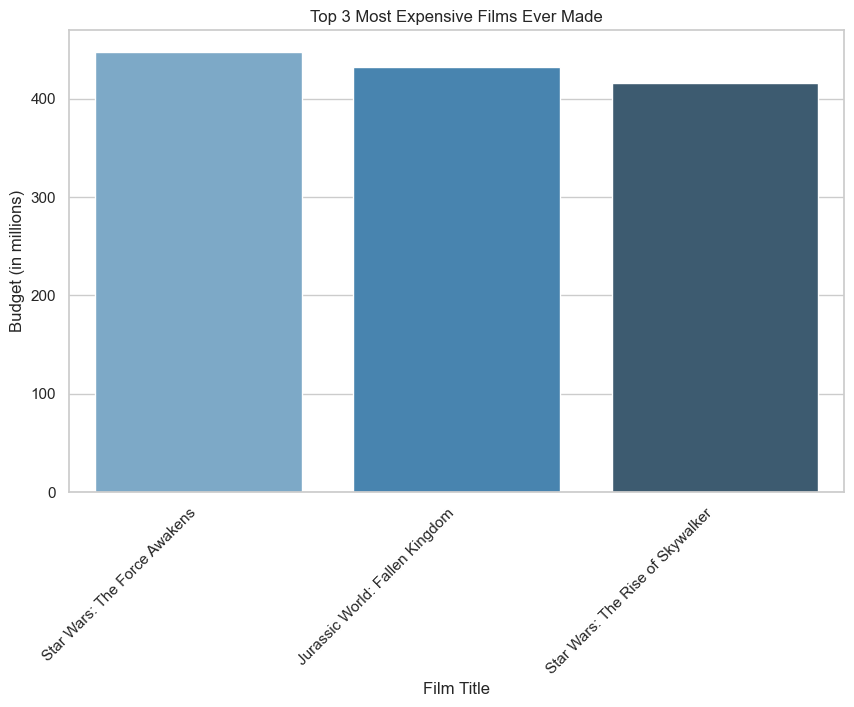

In [100]:
expensive_df['Budget'] = expensive_df['Budget'].replace('[\$,]', '', regex=True).astype(float)

top_3_expensive_films = expensive_df.sort_values(by='Budget', ascending=False).head(3)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_3_expensive_films, x='Title', y='Budget', palette='Blues_d')

plt.xlabel('Film Title')
plt.ylabel('Budget (in millions)')
plt.title('Top 3 Most Expensive Films Ever Made')

plt.xticks(rotation=45, ha='right') 
plt.show()

### Q2: Who are the top 5 highest-paid actors?

C:\Users\ginas\AppData\Local\Temp\ipykernel_62208\685125707.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors, x='Earnings', y='Actor', palette='Purples_d')


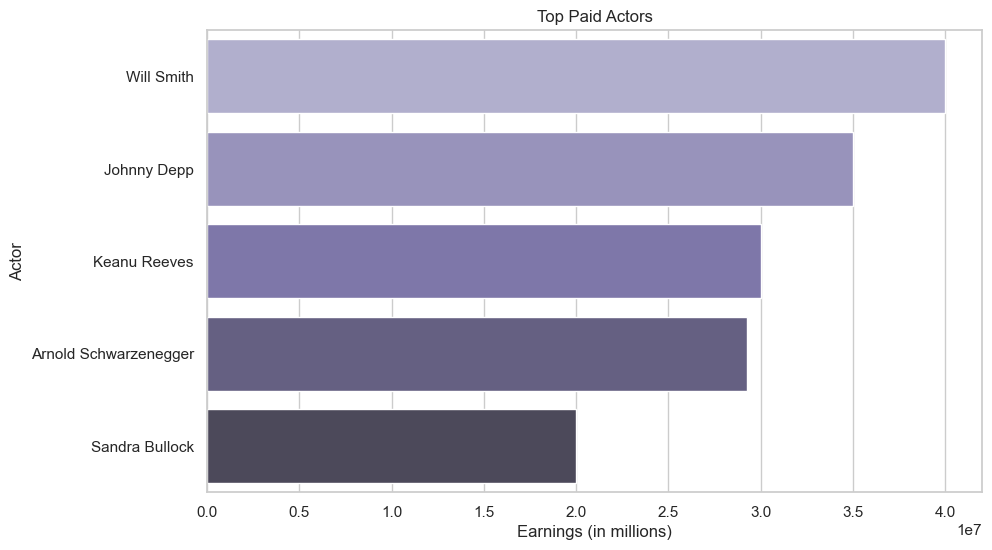

                    Actor    Earnings
26             Will Smith  40000000.0
16            Johnny Depp  35000000.0
0            Keanu Reeves  30000000.0
31  Arnold Schwarzenegger  29250000.0
10         Sandra Bullock  20000000.0


In [108]:
actors_df['Earnings'] = actors_df['Earnings'].astype(float)

sorted_actors = actors_df.sort_values(by='Earnings', ascending=False)

top_actors = sorted_actors.drop_duplicates(subset='Earnings', keep='first').head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_actors, x='Earnings', y='Actor', palette='Purples_d')
plt.title('Top Paid Actors')
plt.xlabel('Earnings (in millions)')
plt.ylabel('Actor')
plt.show()

print(top_actors[['Actor', 'Earnings']])

### Q3: Which actor appears most frequently on the highest-paid list?

In [86]:
actor_counts = actors_df['Actor'].value_counts()
most_frequent_actor = actor_counts.idxmax()
appearances = actor_counts.max()
print(f"The actor who appears most frequently is {most_frequent_actor} with {appearances} appearances.")

The actor who appears most frequently is Robert Downey Jr. with 2 appearances.


### Q4: What is the average production budget of the most expensive films?

In [87]:
avg_budget = expensive_df["Budget"].mean()
print(f"Average Production Budget (Top Expensive Films): ${avg_budget:.2f} million")

Average Production Budget (Top Expensive Films): $266.53 million


### Q5: What is the distribution of movie release years for films with a 100% Rotten Tomatoes score?

C:\Users\ginas\AppData\Local\Temp\ipykernel_62208\2351135793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_df['Year'] = pd.to_numeric(rt_df['Year'], errors='coerce')
C:\Users\ginas\AppData\Local\Temp\ipykernel_62208\2351135793.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=recent_years_df, x='Year', palette='viridis')


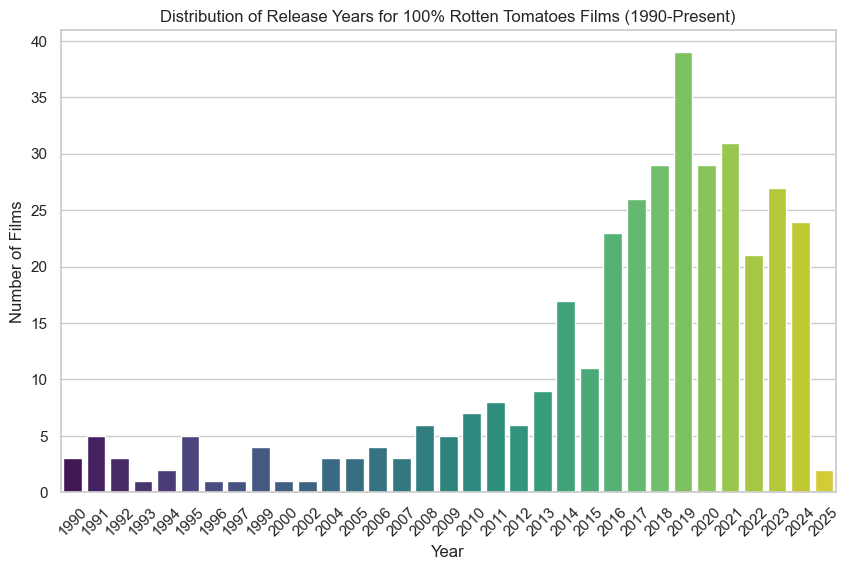

In [ ]:
rt_df['Year'] = pd.to_numeric(rt_df['Year'], errors='coerce')

recent_years_df = rt_df[rt_df['Year'] >= 1990]

plt.figure(figsize=(10, 6))
sns.countplot(data=recent_years_df, x='Year', palette='viridis')
plt.title('Distribution of Release Years for 100% Rotten Tomatoes Films (1990-Present)')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

# Conclusion
#### Most Expensive Films: The most expensive films ever made include two Star Wars films - The Force Awakens and The Rise of Skywalker, as well as Jurassic World: Fallen Kingdom. 
#### Top Earners: The top highest-paid actor is Will Smith, with Johnny Depp and Keanu Reeves trailing behind by about half a million each. 
#### Frequent Appearances: Though he wasn't at the top of the list, Robert Downey Jr. appeared most frequently for highest-paid actors. 
#### Production Budget: The average production budget for the most expensive films is over $250 million. 
#### Rotten Tomatoes: The most films with 100% Rotten Tomatoes scores were produced in 2019.

# Sources
#### chatgpt.com
#### Intro to Python for Computer Science and Data Science - Paul Deitel; Harvey M. Deitel
#### Wikipedia